In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [27]:
allpeptides_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/maxquant/allPeptides.txt', sep='\t')

In [28]:
len(allpeptides_df)

328862

In [29]:
allpeptides_df.head()

,Raw file,Charge,m/z,Mass,Resolution,Number of data points,Number of frames,Number of isotopic peaks,Isotope correlation,Mass fractional part,...,Min frame index,Max frame index,Ion mobility index,Ion mobility index length,Ion mobility index length (FWHM),Intensity,Intensities,Number of pasef MS/MS,Pasef MS/MS IDs,MS/MS scan number
0,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,326.37791,325.37063,24329.390330,3048,20,2,0.999609,0.370635,...,5137,5156,363,54,27,31429.0,NaN,0,NaN,NaN
1,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,312.32607,311.31879,24234.331350,19515,75,2,0.992528,0.318792,...,5351,5425,501,51,21,81118.0,NaN,0,NaN,NaN
2,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,316.28438,315.27711,24449.285122,706,7,2,0.999514,0.277105,...,5112,5118,549,75,27,36051.0,NaN,0,NaN,NaN
3,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,307.09608,306.08880,24469.582565,7633,22,2,0.998656,0.088801,...,4935,4956,651,111,30,295110.0,NaN,0,NaN,NaN
4,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,316.16858,315.16130,24514.638897,108,3,2,0.999752,0.161303,...,5032,5034,645,21,18,7543.2,NaN,0,NaN,NaN


In [30]:
allpeptides_df.columns

Index([u'Raw file', u'Charge', u'm/z', u'Mass', u'Resolution',
       u'Number of data points', u'Number of frames',
       u'Number of isotopic peaks', u'Isotope correlation',
       u'Mass fractional part', u'Mass deficit', u'Retention time',
       u'Retention length', u'Retention length (FWHM)', u'Min frame index',
       u'Max frame index', u'Ion mobility index', u'Ion mobility index length',
       u'Ion mobility index length (FWHM)', u'Intensity', u'Intensities',
       u'Number of pasef MS/MS', u'Pasef MS/MS IDs', u'MS/MS scan number'],
      dtype='object')

In [31]:
allpeptides_df.rename(columns={'Number of isotopic peaks': 'isotope_count', 'm/z': 'mz', 'Intensity': 'intensity', 'Retention time': 'rt', 'Charge': 'charge'}, inplace=True)

In [32]:
feature_list_filename = "/Users/darylwilding-mcbride/Downloads/features/HeLa_20KInt-feature-list.csv"
feature_list_df = pd.read_csv(feature_list_filename)

In [33]:
feature_list_df.head()

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_scan_lower,base_peak_scan_upper,base_peak_centroid_rt,base_peak_std_dev_rt,base_peak_rt_lower,base_peak_rt_upper,base_peak_centroid_mz,base_peak_std_dev_mz,base_peak_mz_lower,base_peak_mz_upper
0,1,3,1960.915588,680.366484,4013.127018,654.717577,4005.957188,4021.318195,668,688,...,668,688,4013.130741,3.845270,4005.957188,4021.318195,654.645757,0.002612,654.619261,654.675743
1,2,2,1247.602054,574.224714,1085.766969,625.127677,1075.177570,1097.628037,565,585,...,565,585,1085.746282,2.179954,1075.177570,1097.628037,624.809083,0.002324,624.778556,624.833736
2,3,2,1789.900380,379.472823,4433.432999,896.216859,4421.919624,4439.635599,367,387,...,367,387,4436.255100,2.552869,4421.919624,4439.635599,896.459161,0.003005,896.413464,896.498444
3,4,2,1405.719333,527.432220,4034.358108,704.126734,4022.496117,4044.962866,519,539,...,519,539,4034.498268,3.537136,4024.859526,4044.962866,703.867085,0.005701,703.834050,703.900983
4,5,2,2214.082282,231.310785,5002.872698,1108.270682,4991.075059,5008.786578,221,241,...,221,241,5002.369948,1.875718,4991.075059,5008.786578,1108.049241,0.003916,1107.997794,1108.087022


In [34]:
feature_list_df.columns

Index([u'feature_id', u'charge_state', u'monoisotopic_mass',
       u'feature_centroid_scan', u'feature_centroid_rt',
       u'feature_centroid_mz', u'feature_start_rt', u'feature_end_rt',
       u'feature_scan_lower', u'feature_scan_upper',
       u'feature_summed_intensity', u'isotope_count', u'mono_peak_id',
       u'mono_peak_centroid_scan', u'mono_peak_std_dev_scan',
       u'mono_peak_scan_lower', u'mono_peak_scan_upper',
       u'mono_peak_centroid_rt', u'mono_peak_std_dev_rt',
       u'mono_peak_rt_lower', u'mono_peak_rt_upper', u'mono_peak_centroid_mz',
       u'mono_peak_std_dev_mz', u'mono_peak_mz_lower', u'mono_peak_mz_upper',
       u'base_peak_id', u'base_peak_centroid_scan', u'base_peak_std_dev_scan',
       u'base_peak_scan_lower', u'base_peak_scan_upper',
       u'base_peak_centroid_rt', u'base_peak_std_dev_rt',
       u'base_peak_rt_lower', u'base_peak_rt_upper', u'base_peak_centroid_mz',
       u'base_peak_std_dev_mz', u'base_peak_mz_lower', u'base_peak_mz_upper'],
 

In [35]:
feature_list_subset_df = feature_list_df[["feature_id","mono_peak_centroid_mz","mono_peak_centroid_rt","mono_peak_centroid_scan","monoisotopic_mass","feature_summed_intensity","charge_state"]].copy()

In [36]:
feature_list_subset_df.sort_values(by=['feature_summed_intensity'], ascending=False, inplace=True)

In [37]:
evidence_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/maxquant/evidence.txt', sep='\t')

In [38]:
evidence_df.head()

,Sequence,Length,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,Acetyl (Protein N-term),Oxidation (M),Missed cleavages,Proteins,...,Reverse,Potential contaminant,id,Protein group IDs,Peptide ID,Mod. peptide ID,MS/MS IDs,Best MS/MS,AIF MS/MS IDs,Oxidation (M) site IDs
0,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,1,0,0,sp|Q86U42|PABP2_HUMAN,...,NaN,NaN,0,2971,0,0,0,0,NaN,NaN
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ,29,Unmodified,_AAAAAAAAAPAAAATAPTTAATTAATAAQ_,NaN,NaN,0,0,0,sp|P37108|SRP14_HUMAN;tr|H0YLW0|H0YLW0_HUMAN,...,NaN,NaN,1,1396,1,1,1,1,NaN,NaN
2,AAAAAAAAAPAAAATAPTTAATTAATAAQ,29,Unmodified,_AAAAAAAAAPAAAATAPTTAATTAATAAQ_,NaN,NaN,0,0,0,sp|P37108|SRP14_HUMAN;tr|H0YLW0|H0YLW0_HUMAN,...,NaN,NaN,2,1396,1,1,2,2,NaN,NaN
3,AAAAAAAAVPSAGPAGPAPTSAAGR,25,Unmodified,_AAAAAAAAVPSAGPAGPAPTSAAGR_,NaN,NaN,0,0,0,sp|Q9Y4H2|IRS2_HUMAN,...,NaN,NaN,3,4916,2,2,3,3,NaN,NaN
4,AAAAAAAGDSDSWDADAFSVEDPVRK,26,Acetyl (Protein N-term),_(ac)AAAAAAAGDSDSWDADAFSVEDPVRK_,NaN,NaN,1,0,1,sp|O75822|EIF3J_HUMAN,...,NaN,NaN,4,595,3,3,4,4,NaN,NaN


In [39]:
evidence_df.columns

Index([u'Sequence', u'Length', u'Modifications', u'Modified sequence',
       u'Oxidation (M) Probabilities', u'Oxidation (M) Score Diffs',
       u'Acetyl (Protein N-term)', u'Oxidation (M)', u'Missed cleavages',
       u'Proteins', u'Leading proteins', u'Leading razor protein', u'Type',
       u'Raw file', u'MS/MS m/z', u'Charge', u'm/z', u'Mass', u'Resolution',
       u'Uncalibrated - Calibrated m/z [ppm]',
       u'Uncalibrated - Calibrated m/z [Da]', u'Mass error [ppm]',
       u'Mass error [Da]', u'Uncalibrated mass error [ppm]',
       u'Uncalibrated mass error [Da]', u'Max intensity m/z 0',
       u'Retention time', u'Retention length', u'Calibrated retention time',
       u'Calibrated retention time start', u'Calibrated retention time finish',
       u'Retention time calibration', u'Ion mobility index',
       u'Ion mobility length', u'CCS', u'CCS length', u'Match time difference',
       u'Match m/z difference', u'Match q-value', u'Match score',
       u'Number of data points

In [40]:
evidence_subset_df = evidence_df[["m/z","Mass","Uncalibrated - Calibrated m/z [Da]","Uncalibrated - Calibrated m/z [ppm]","Intensity","Charge"]]

In [41]:
evidence_subset_df.sort_values(by=['Intensity'], ascending=False).head()

,m/z,Mass,Uncalibrated - Calibrated m/z [Da],Uncalibrated - Calibrated m/z [ppm],Intensity,Charge
34107,895.949598,1789.884640,0.001399,1.5620,26707000.0,2
35643,714.345717,713.338441,0.003256,4.5587,25183000.0,1
36755,655.854864,1309.695170,0.001410,2.1494,23453000.0,2
13273,706.398815,1410.783080,0.001835,2.5979,21142000.0,2
6169,1108.038620,2214.062680,0.002296,2.0719,19726000.0,2


In [42]:
evidence_subset_df["Uncalibrated - Calibrated m/z [ppm]"].median()

0.746095

In [43]:
evidence_subset_df["Uncalibrated - Calibrated m/z [ppm]"].mean()

0.5215258616588035

In [44]:
allpeptides_subset_df = allpeptides_df[["mz","intensity","charge","rt","Ion mobility index"]].copy()

In [45]:
allpeptides_subset_df.sort_values(by=['intensity'], ascending=False).head()

,mz,intensity,charge,rt,Ion mobility index
273238,895.95670,26707000.0,2,4432.552,363
195754,714.35058,25183000.0,1,3224.585,183
155746,655.86110,23453000.0,2,4728.970,474
206499,706.40506,21142000.0,2,3332.142,540
311960,1108.04640,19726000.0,2,4999.334,204


In [62]:
allpeptides_subset_df = allpeptides_subset_df[allpeptides_subset_df.intensity.notnull()].copy()

allpeptides_subset_df.sort_values(by=['intensity'], ascending=False, inplace=True)
allpeptides_subset_df["mq_feature_id"] = np.arange(start=1, stop=len(allpeptides_subset_df)+1)

Vary PPM to find the number of MQ matches for each feature

In [90]:
df = []

for ppm in (1,3,5,7):
    MZ_TOLERANCE_PPM = ppm
    MZ_TOLERANCE_PERCENT = MZ_TOLERANCE_PPM * 10**-4 
    RT_TOLERANCE_SECS = 12

    allpeptides_subset_df["mz_delta"] = allpeptides_subset_df.mz * MZ_TOLERANCE_PERCENT / 100
    allpeptides_subset_df["mz_upper"] = allpeptides_subset_df.mz + allpeptides_subset_df.mz_delta
    allpeptides_subset_df["mz_lower"] = allpeptides_subset_df.mz - allpeptides_subset_df.mz_delta

    allpeptides_subset_df["rt_upper"] = allpeptides_subset_df.rt + RT_TOLERANCE_SECS
    allpeptides_subset_df["rt_lower"] = allpeptides_subset_df.rt - RT_TOLERANCE_SECS

    # find the number of my features that match with each MQ feature
    # step through my features and find the MQ features that match
    matches = []
    for idx in range(len(feature_list_subset_df)):
        feature_id = feature_list_subset_df.iloc[idx].feature_id
        monoisotopic_mz = feature_list_subset_df.iloc[idx].mono_peak_centroid_mz
        monoisotopic_rt = feature_list_subset_df.iloc[idx].mono_peak_centroid_rt
        charge_state = feature_list_subset_df.iloc[idx].charge_state
        matches_df = allpeptides_subset_df[
                                    (
                                        (allpeptides_subset_df.mz_lower <= monoisotopic_mz) &
                                        (allpeptides_subset_df.mz_upper >= monoisotopic_mz)
                                    ) &
                                    (
                                        (allpeptides_subset_df.rt_lower <= monoisotopic_rt) &
                                        (allpeptides_subset_df.rt_upper >= monoisotopic_rt)
                                    ) &
                                    (
                                        allpeptides_subset_df.charge == charge_state
                                    )
        ]
        matches.append((int(feature_id), len(matches_df)))

    mq_matches_df = pd.DataFrame(matches,columns=["feature_id","mq_feature_matches"])
    mq_matches_df.feature_id = mq_matches_df.feature_id.astype(np.int)
    df.append((MZ_TOLERANCE_PPM, RT_TOLERANCE_SECS, mq_matches_df))

In [91]:
highest_number_of_matches = pd.concat([i[2] for i in df]).mq_feature_matches.max()

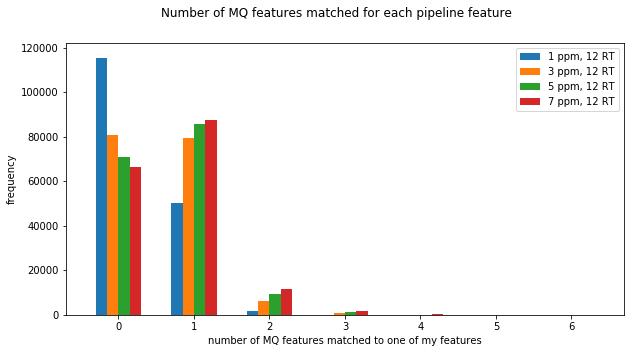

In [92]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
plt.hist([i[2].mq_feature_matches for i in df], bins=np.arange(start=0, stop=highest_number_of_matches+2)-0.5, rwidth=0.6, label=['{} ppm, {} RT'.format(i[0], i[1]) for i in df])
plt.legend(loc='best')
plt.xlabel('number of MQ features matched to one of my features')
plt.ylabel('frequency')
plt.margins(0.06)
plt.suptitle('Number of MQ features matched for each pipeline feature')
# plt.title('m/z tolerance +/- {} ppm, RT tolerance +/- {} secs'.format(MZ_TOLERANCE_PPM, RT_TOLERANCE_SECS))
plt.show()

Vary RT delta to find the number of MQ matches for each feature

In [93]:
df = []

for rt_delta in (6,9,12,15):
    MZ_TOLERANCE_PPM = 5
    MZ_TOLERANCE_PERCENT = MZ_TOLERANCE_PPM * 10**-4 
    RT_TOLERANCE_SECS = rt_delta

    allpeptides_subset_df["mz_delta"] = allpeptides_subset_df.mz * MZ_TOLERANCE_PERCENT / 100
    allpeptides_subset_df["mz_upper"] = allpeptides_subset_df.mz + allpeptides_subset_df.mz_delta
    allpeptides_subset_df["mz_lower"] = allpeptides_subset_df.mz - allpeptides_subset_df.mz_delta

    allpeptides_subset_df["rt_upper"] = allpeptides_subset_df.rt + RT_TOLERANCE_SECS
    allpeptides_subset_df["rt_lower"] = allpeptides_subset_df.rt - RT_TOLERANCE_SECS

    # find the number of my features that match with each MQ feature
    # step through my features and find the MQ features that match
    matches = []
    for idx in range(len(feature_list_subset_df)):
        feature_id = feature_list_subset_df.iloc[idx].feature_id
        monoisotopic_mz = feature_list_subset_df.iloc[idx].mono_peak_centroid_mz
        monoisotopic_rt = feature_list_subset_df.iloc[idx].mono_peak_centroid_rt
        charge_state = feature_list_subset_df.iloc[idx].charge_state
        matches_df = allpeptides_subset_df[
                                    (
                                        (allpeptides_subset_df.mz_lower <= monoisotopic_mz) &
                                        (allpeptides_subset_df.mz_upper >= monoisotopic_mz)
                                    ) &
                                    (
                                        (allpeptides_subset_df.rt_lower <= monoisotopic_rt) &
                                        (allpeptides_subset_df.rt_upper >= monoisotopic_rt)
                                    ) &
                                    (
                                        allpeptides_subset_df.charge == charge_state
                                    )
        ]
        matches.append((int(feature_id), len(matches_df)))

    mq_matches_df = pd.DataFrame(matches,columns=["feature_id","mq_feature_matches"])
    mq_matches_df.feature_id = mq_matches_df.feature_id.astype(np.int)
    df.append((MZ_TOLERANCE_PPM, RT_TOLERANCE_SECS, mq_matches_df))

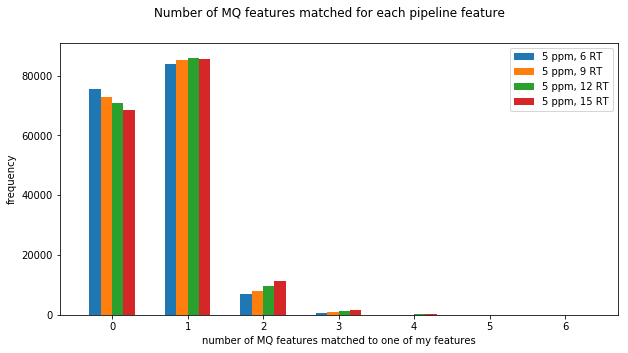

In [94]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
plt.hist([i[2].mq_feature_matches for i in df], bins=np.arange(start=0, stop=highest_number_of_matches+2)-0.5, rwidth=0.6, label=['{} ppm, {} RT'.format(i[0], i[1]) for i in df])
plt.legend(loc='best')
plt.xlabel('number of MQ features matched to one of my features')
plt.ylabel('frequency')
plt.margins(0.06)
plt.suptitle('Number of MQ features matched for each pipeline feature')
# plt.title('m/z tolerance +/- {} ppm, RT tolerance +/- {} secs'.format(MZ_TOLERANCE_PPM, RT_TOLERANCE_SECS))
plt.show()

For each MQ feature, find the matches with pipeline features

In [95]:
df = []

MZ_TOLERANCE_PPM = 5
MZ_TOLERANCE_PERCENT = MZ_TOLERANCE_PPM * 10**-4 
RT_TOLERANCE_SECS = 6

allpeptides_subset_df["mz_delta"] = allpeptides_subset_df.mz * MZ_TOLERANCE_PERCENT / 100
allpeptides_subset_df["mz_upper"] = allpeptides_subset_df.mz + allpeptides_subset_df.mz_delta
allpeptides_subset_df["mz_lower"] = allpeptides_subset_df.mz - allpeptides_subset_df.mz_delta

allpeptides_subset_df["rt_upper"] = allpeptides_subset_df.rt + RT_TOLERANCE_SECS
allpeptides_subset_df["rt_lower"] = allpeptides_subset_df.rt - RT_TOLERANCE_SECS

# find the number of my features that match with each MQ feature
# step through my features and find the MQ features that match
matches = []
for idx in range(len(allpeptides_subset_df)):
    mq_feature_id = allpeptides_subset_df.iloc[idx].mq_feature_id
    mz_lower = allpeptides_subset_df.iloc[idx].mz_lower
    mz_upper = allpeptides_subset_df.iloc[idx].mz_upper
    rt_lower = allpeptides_subset_df.iloc[idx].rt_lower
    rt_upper = allpeptides_subset_df.iloc[idx].rt_upper
    charge = allpeptides_subset_df.iloc[idx].charge
    matches_df = feature_list_subset_df[
                                (
                                    (mz_lower <= feature_list_subset_df.mono_peak_centroid_mz) &
                                    (mz_upper >= feature_list_subset_df.mono_peak_centroid_mz)
                                ) &
                                (
                                    (rt_lower <= feature_list_subset_df.mono_peak_centroid_rt) &
                                    (rt_upper >= feature_list_subset_df.mono_peak_centroid_rt)
                                ) &
                                (
                                    charge == feature_list_subset_df.charge_state
                                )
    ]
    matches.append((int(mq_feature_id), len(matches_df)))

mq_matches_df = pd.DataFrame(matches,columns=["mq_feature_id","feature_matches"])
mq_matches_df.mq_feature_id = mq_matches_df.mq_feature_id.astype(np.int)

In [112]:
highest_number_of_matches = mq_matches_df.feature_matches.max()

In [113]:
highest_number_of_matches

17

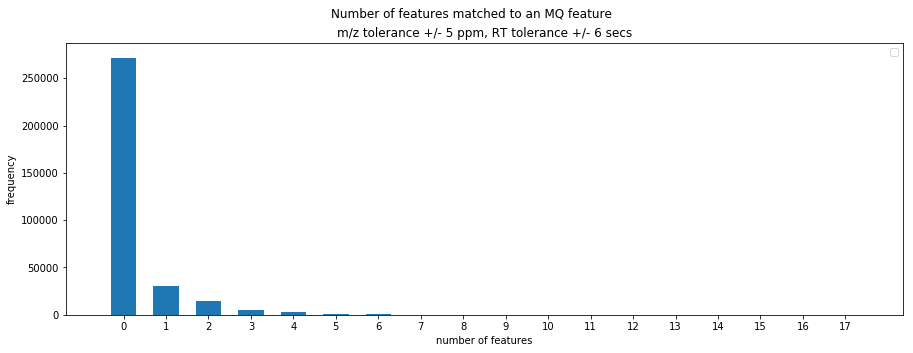

In [124]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)
plt.hist(mq_matches_df.feature_matches, bins=np.arange(start=0, stop=mq_matches_df.feature_matches.max()+2, step=1, dtype=np.int)-0.5, rwidth=0.6)
plt.legend(loc='best')
plt.xlabel('number of features')
plt.ylabel('frequency')
plt.margins(0.06)
plt.xticks(range(highest_number_of_matches+1))
# ax1.set_yscale('log')
plt.suptitle('Number of features matched to an MQ feature')
plt.title('m/z tolerance +/- {} ppm, RT tolerance +/- {} secs'.format(MZ_TOLERANCE_PPM, RT_TOLERANCE_SECS))
plt.show()

Visualise the features matched to an MQ feature

In [137]:
mq_matches_df.head(10)

,mq_feature_id,feature_matches
0,1,8
1,2,0
2,3,4
3,4,2
4,5,5
5,6,5
6,7,3
7,8,11
8,9,3
9,10,11


In [142]:
MQ_FEATURE_ID = 8

In [143]:
mq_feature_df = allpeptides_subset_df[allpeptides_subset_df.mq_feature_id == MQ_FEATURE_ID].iloc[0]

mz_lower = mq_feature_df.mz_lower
mz_upper = mq_feature_df.mz_upper
rt_lower = mq_feature_df.rt_lower
rt_upper = mq_feature_df.rt_upper
charge = mq_feature_df.charge

matches_df = feature_list_subset_df[
                            (
                                (mz_lower <= feature_list_subset_df.mono_peak_centroid_mz) &
                                (mz_upper >= feature_list_subset_df.mono_peak_centroid_mz)
                            ) &
                            (
                                (rt_lower <= feature_list_subset_df.mono_peak_centroid_rt) &
                                (rt_upper >= feature_list_subset_df.mono_peak_centroid_rt)
                            ) &
                            (
                                charge == feature_list_subset_df.charge_state
                            )
]

In [144]:
matches_df

,feature_id,mono_peak_centroid_mz,mono_peak_centroid_rt,mono_peak_centroid_scan,monoisotopic_mass,feature_summed_intensity,charge_state
1296,1299,877.900930,4456.599656,347.286245,1753.785432,4982026,2
277,279,877.904121,4456.205259,418.176964,1753.792883,3670241,2
4330,4339,877.900148,4459.915052,347.287122,1753.783798,2413061,2
1287,1290,877.903186,4455.847498,396.001424,1753.789939,2151530,2
2963,2969,877.903626,4456.354104,406.614027,1753.789950,1723735,2
4473,4483,877.903600,4459.129564,421.925948,1753.794856,1141726,2
4230,4238,877.904076,4460.583407,399.954369,1753.790536,843799,2
42093,42340,877.903099,4458.543392,480.403642,1753.791589,303718,2
35250,35437,877.899499,4456.079668,368.707272,1753.784962,223254,2
110749,111912,877.902236,4455.010857,498.944151,1753.789509,58503,2


In [145]:
mq_feature_df

mz                    8.779015e+02
intensity             1.636700e+07
charge                2.000000e+00
rt                    4.457345e+03
Ion mobility index    4.110000e+02
mq_feature_id         8.000000e+00
mz_delta              4.389508e-03
mz_upper              8.779059e+02
mz_lower              8.778971e+02
rt_upper              4.463345e+03
rt_lower              4.451345e+03
Name: 271311, dtype: float64